# Cheat sheet exploration de données

## Sommaire
    I - Import des modules nécessaires
    II - Lecture du fichier csv
    III - Description
        1 - Colonnes
        2 - Dimensionnalité du dataframe
        3 - Description du dataframe
        4 - Infos et Types des colonnes
        5a - Valeurs manquantes
        5b - Valeurs manquantes en pourcentage
        6 - Compter les valeurs par colonne
        7 - Le mode ou la valeur la plus fréquente
    IV - Preprocessing et transformation
        8a - Transformer une colonne date en format datetime
        8b - Modifier le format de la date
        9 - Remplir des valeurs NULL
        10 - Convertir le type d'une colonne
        11 - Remplacer des valeurs
        12 - Groupby
        13a1 - Filtrer un dataframe : lignes
        13a2 - Filtrer un dataframe : lignes
        13a3 - Filtrer un dataframe : lignes
        13b - Filtrer un dataframe : colonnes
        14 - Exporter un fichier en csv
    V - Visualisation des données
        15a - Visualisation avec la fonction plot d'un Dataframe (pandas)
        15b - Visualisation avec la fonction plot de Seaborn
        15c - Visualisation avec la fonction plot de Matplotlib
        16 - Visualisation en nuage de point (scatterplot)
        17 - Analyse des corrélations entre variables

## I - Import des modules nécessaires

Afin de manipuler les données, il faut importer certains modules python (la plupart sont intégrés à l'environnement). 

In [1]:
#Pandas : manipulation de données et preprocessing
#Numpy : calculs scientifiques, matriciels
#Datetime : formatage et manipulation des dates/heures
#Matplotlib : outil de visualisation
#Seaborn : outil de visualisation avancé avec syntaxe simplifiée (basé sur Matplotlib)
#Dask : package avancé pour la manipulation de gros volumes de données (plus complexe que pandas) => optionnel

In [2]:
import os
import pandas as pd 
import numpy as np 
from datetime import datetime 
import matplotlib.pyplot as plt 
import seaborn as sns 
import dask.dataframe as dd 

NB : pour tout module et méthode, tapez help(module.méthode) pour afficher la documentation et l'aide
exemple : help(pd.isna) affiche l'aide de la méthode 'isna()' du module 'pandas'

In [3]:
#help(pd.isna)

## II - Lecture du fichier csv

Définissons les chemins des fichiers csv à lire :
* os.path.abspath() : renvoie le chemin abolu.
* os.path.join() : concatene plusieurs chemins.

In [4]:
BASE = os.path.abspath("C:/Users/sacha/OneDrive/Documents/Projets Data/PSB MScDM Course DB/Data/Barcelona data sets")
air_quality_path = os.path.join(BASE,"air_quality_Nov2017.csv")
#source : https://www.kaggle.com/xvivancos/barcelona-data-sets?select=air_quality_Nov2017.csv

pd.read_csv() : lit un fichier csv (comma-separated values) dans un dataframe.

In [5]:
air_quality = pd.read_csv(air_quality_path)

## III - Description

pd.DataFrame.head() : sort les 5 premières lignes du dataframe

In [6]:
air_quality.head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104


### 1 - Colonnes

pd.DataFrame.columns : liste les colonnes du dataframe

In [7]:
air_quality.columns

Index(['Station', 'Air Quality', 'Longitude', 'Latitude', 'O3 Hour',
       'O3 Quality', 'O3 Value', 'NO2 Hour', 'NO2 Quality', 'NO2 Value',
       'PM10 Hour', 'PM10 Quality', 'PM10 Value', 'Generated', 'Date Time'],
      dtype='object')

### 2 - Dimensionnalité du dataframe

pd.DataFrame.shape : renvoie un tuple des dimensions du dataframe (rows, columns)

In [8]:
air_quality.shape

(5744, 15)

### 3 - Description du dataframe

pd.DataFrame.describe() : génère des statistiques descriptives

In [9]:
air_quality.describe()

,Longitude,Latitude,O3 Value,NO2 Value,PM10 Value,Date Time
count,5744.00000,5744.000000,4101.000000,5460.000000,3647.000000,5.744000e+03
mean,2.15240,13877.827714,34.082907,35.740293,16.590074,1.542323e+09
std,0.02859,74410.803168,22.960687,22.357262,8.065424,7.483961e+05
min,2.11510,41.378800,1.000000,1.000000,2.000000,1.541027e+09
25%,2.13080,41.386400,14.000000,17.000000,10.000000,1.541675e+09
50%,2.15070,41.398700,34.000000,33.000000,15.000000,1.542325e+09
75%,2.16220,41.418300,52.000000,52.000000,22.000000,1.542971e+09
max,2.20450,414261.000000,100.000000,117.000000,44.000000,1.543616e+09


### 4 - Infos et Types des colonnes

pd.DataFrame.info() : renvoie les informations concises du dataframe (colonnes, valeurs non-nulles, types, utilisation de la mémoire).

In [10]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Station       5744 non-null   object 
 1   Air Quality   5744 non-null   object 
 2   Longitude     5744 non-null   float64
 3   Latitude      5744 non-null   float64
 4   O3 Hour       4268 non-null   object 
 5   O3 Quality    4268 non-null   object 
 6   O3 Value      4101 non-null   float64
 7   NO2 Hour      5689 non-null   object 
 8   NO2 Quality   5689 non-null   object 
 9   NO2 Value     5460 non-null   float64
 10  PM10 Hour     3722 non-null   object 
 11  PM10 Quality  3722 non-null   object 
 12  PM10 Value    3647 non-null   float64
 13  Generated     5744 non-null   object 
 14  Date Time     5744 non-null   int64  
dtypes: float64(5), int64(1), object(9)
memory usage: 673.2+ KB


pd.DataFrame.dtypes : renvoie les types des colonnes.

In [11]:
air_quality.dtypes

Station          object
Air Quality      object
Longitude       float64
Latitude        float64
O3 Hour          object
O3 Quality       object
O3 Value        float64
NO2 Hour         object
NO2 Quality      object
NO2 Value       float64
PM10 Hour        object
PM10 Quality     object
PM10 Value      float64
Generated        object
Date Time         int64
dtype: object

### 5a - Valeurs manquantes

pd.DataFrame.isna().sum() : renvoie la somme des valeurs manquantes du dataframe par colonne.
* pd.DataFrame.isna() : renvoie le dataframe avec les valeurs manquantes sous forme de booléen (True, False).
* pd.DataFrame.sum() : renvoie la somme des valeurs demandées.

In [12]:
air_quality.isna().sum()

Station            0
Air Quality        0
Longitude          0
Latitude           0
O3 Hour         1476
O3 Quality      1476
O3 Value        1643
NO2 Hour          55
NO2 Quality       55
NO2 Value        284
PM10 Hour       2022
PM10 Quality    2022
PM10 Value      2097
Generated          0
Date Time          0
dtype: int64

### 5b - Valeurs manquantes en pourcentage

pd.DataFrame.isna().mean() : renvoie la part des valeurs manquantes du dataframe par colonne.

In [13]:
air_quality.isna().mean()*100

Station          0.000000
Air Quality      0.000000
Longitude        0.000000
Latitude         0.000000
O3 Hour         25.696379
O3 Quality      25.696379
O3 Value        28.603760
NO2 Hour         0.957521
NO2 Quality      0.957521
NO2 Value        4.944290
PM10 Hour       35.201950
PM10 Quality    35.201950
PM10 Value      36.507660
Generated        0.000000
Date Time        0.000000
dtype: float64

### 6 - Compter les valeurs par colonne

Une colonne d'un dataframe peut être considéré comme une Serie (matrice à une dimension).
- pd.Series.value_counts() : renvoie le nombre de valeur par catégorie.

In [14]:
air_quality['Air Quality'].value_counts()

Good        5453
--           161
Moderate     130
Name: Air Quality, dtype: int64

### 7 - Le mode ou la valeur la plus fréquente

pd.Series.mode() : renvoie le mode, ou la valeur la plus fréquente de la série.

In [15]:
air_quality['Air Quality'].mode()

0    Good
dtype: object

In [16]:
print("La valeur la plus fréquente est {}".format(air_quality['Air Quality'].mode().values))

La valeur la plus fréquente est ['Good']


## IV - Preprocessing et transformation

### 8a - Transformer une colonne date en format datetime

pd.to_datetime(pd.Series) : converti la colonne en datetime.

In [17]:
air_quality['Date Time'] = pd.to_datetime(air_quality['Date Time'])
air_quality['Generated'] = pd.to_datetime(air_quality['Generated'])

### 8b - Modifier le format de la date

pd.Series.dt.strftime().astype() : converti la date avec le format spécifié.
* pd.Series.dt.strftime() : transforme la colonne date en caractère avec le format spécifié.
* pd.Series.astype() : converti la série avec le type spécifié.

In [18]:
air_quality['Date Time'] = air_quality['Date Time'].dt.strftime('%Y-%m-%d').astype('datetime64[ns]')
air_quality['Generated'] = air_quality['Generated'].dt.strftime('%Y-%m-%d').astype('datetime64[ns]')

NB : Vous pouvez enchainer les deux codes précédents comme :
pd.to_datetime(air_quality['Date Time']).dt.strftime('%Y-%m-%d').astype('datetime64[ns]').

In [19]:
air_quality.head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,2018-01-11,1970-01-01
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,2018-01-11,1970-01-01
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,2018-01-11,1970-01-01
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,2018-01-11,1970-01-01
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,2018-01-11,1970-01-01


### 9 - Remplir des valeurs NULL

pd.Series.fillna() : remplir les valeurs manquantes par les valeurs spécifiées.
* Ajouter le paramètre 'method' permet de spécifier une méthode de remplissage comme :
* 'method = bfill' (rempli les valeurs manquantes avec la valeur suivante valide)
* 'method = ffill' (rempli les valeurs manquantes avec la valeur précédente valide).

In [20]:
for c in air_quality.columns:
    if c.endswith("Value"):
        air_quality[c] = air_quality[c].fillna(0)

### 10 - Convertir le type d'une colonne

pd.Series.astype() : convertir la série avec le type spécifié.

In [21]:
for c in air_quality.columns:
    if c.endswith("Value"):
        air_quality[c] = air_quality[c].astype('int')

In [22]:
air_quality.head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,0,0h,Good,84,NaN,NaN,0,2018-01-11,1970-01-01
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1,0h,Moderate,113,0h,Good,36,2018-01-11,1970-01-01
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10,0h,Good,73,NaN,NaN,0,2018-01-11,1970-01-01
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2,0h,Good,86,NaN,NaN,0,2018-01-11,1970-01-01
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7,0h,Good,69,NaN,NaN,0,2018-01-11,1970-01-01


In [23]:
air_quality.dtypes

Station                 object
Air Quality             object
Longitude              float64
Latitude               float64
O3 Hour                 object
O3 Quality              object
O3 Value                 int32
NO2 Hour                object
NO2 Quality             object
NO2 Value                int32
PM10 Hour               object
PM10 Quality            object
PM10 Value               int32
Generated       datetime64[ns]
Date Time       datetime64[ns]
dtype: object

### 11 - Remplacer des valeurs

pd.Series.replace() : remplace les valeurs spécifiées (valeurs avant, valeurs après).
* Ajouter le paramètre 'method' permet de spécifier une méthode de remplacement comme :
* 'method = bfill' (remplace les valeurs avec la valeur suivante valide)
* 'method = ffill' (remplace les valeurs avec la valeur précédente valide).

In [24]:
replace_values = {'Good' : 2, 'Moderate' : 1, '--' : 0 }
air_quality['Air Quality'] = air_quality['Air Quality'].replace(replace_values)

In [25]:
air_quality.head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,2,2.1331,41.3788,NaN,NaN,0,0h,Good,84,NaN,NaN,0,2018-01-11,1970-01-01
1,Barcelona - Eixample,1,2.1538,41.3853,0h,Good,1,0h,Moderate,113,0h,Good,36,2018-01-11,1970-01-01
2,Barcelona - Gràcia,2,2.1534,41.3987,0h,Good,10,0h,Good,73,NaN,NaN,0,2018-01-11,1970-01-01
3,Barcelona - Ciutadella,2,2.1874,41.3864,0h,Good,2,0h,Good,86,NaN,NaN,0,2018-01-11,1970-01-01
4,Barcelona - Vall Hebron,2,2.1480,41.4261,0h,Good,7,0h,Good,69,NaN,NaN,0,2018-01-11,1970-01-01


In [26]:
air_quality['Air Quality'].value_counts()

2    5453
0     161
1     130
Name: Air Quality, dtype: int64

In [27]:
print("Sur une échelle de 0 à 2, la qualité de l'air à Barcelone est de {:.2f}"\
      .format(air_quality['Air Quality'].mean()))

Sur une échelle de 0 à 2, la qualité de l'air à Barcelone est de 1.92


### 12 - Groupby

* pd.DataFrame.groupby() : modifie le dataframe pour calculer des agrégats en fonction de la valeur de groupement.
* pd.DataFrame.agg() : calcule des agrégats à l'aide d'un dictionnaire {'colonne':'agrégat'}.
* pd.DataFrame.sort_values() : trie les valeurs de sortie par la colonne spécifiée.

In [28]:
air_qua_station = air_quality.groupby('Station')\
.agg({'Air Quality' : 'mean'})\
.sort_values(by = 'Air Quality', ascending=False)

air_qua_station

,Air Quality
Station,
Barcelona - Vall Hebron,1.994429
Barcelona - Palau Reial,1.981894
Barcelona - Observ Fabra,1.977716
Barcelona - Ciutadella,1.952646
Barcelona - Poblenou,1.924791
Barcelona - Eixample,1.884401
Barcelona - Sants,1.869081
Barcelona - Gràcia,1.785515


#### Ou bien

In [29]:
air_quality[['Station', 'Air Quality']].groupby('Station').mean().sort_values(by = 'Air Quality', ascending=False)

,Air Quality
Station,
Barcelona - Vall Hebron,1.994429
Barcelona - Palau Reial,1.981894
Barcelona - Observ Fabra,1.977716
Barcelona - Ciutadella,1.952646
Barcelona - Poblenou,1.924791
Barcelona - Eixample,1.884401
Barcelona - Sants,1.869081
Barcelona - Gràcia,1.785515


### 13a1 - Filtrer un dataframe : lignes

pd.DataFrame.loc() : filtre le dataframe avec les arguments spécifiés [lignes, colonnes]
* pd.DataFrame.set_index() : transforme la colonne spécifiée en indice.
* pd.DataFrame.reset_index() : réinitialise les indices pour retrouver la forme d'origine.

In [30]:
air_quality.set_index('Station').loc["Barcelona - Ciutadella",:].reset_index().head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Ciutadella,2,2.1874,41.3864,0h,Good,2,0h,Good,86,NaN,NaN,0,2018-01-11,1970-01-01
1,Barcelona - Ciutadella,2,2.1874,41.3864,0h,Good,4,0h,Good,78,NaN,NaN,0,2018-01-11,1970-01-01
2,Barcelona - Ciutadella,2,2.1874,41.3864,1h,Good,24,1h,Good,56,NaN,NaN,0,2018-01-11,1970-01-01
3,Barcelona - Ciutadella,2,2.1874,41.3864,2h,Good,45,2h,Good,29,NaN,NaN,0,2018-01-11,1970-01-01
4,Barcelona - Ciutadella,2,2.1874,41.3864,3h,Good,61,3h,Good,19,NaN,NaN,0,2018-01-11,1970-01-01


### 13a2 - Filtrer un dataframe : lignes

pd.DataFrame.query() : crée une requête à l'aide d'une expression booléenne pour filtrer le dataframe.

In [31]:
air_quality.query("Station == 'Barcelona - Ciutadella'").head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
3,Barcelona - Ciutadella,2,2.1874,41.3864,0h,Good,2,0h,Good,86,NaN,NaN,0,2018-01-11,1970-01-01
11,Barcelona - Ciutadella,2,2.1874,41.3864,0h,Good,4,0h,Good,78,NaN,NaN,0,2018-01-11,1970-01-01
19,Barcelona - Ciutadella,2,2.1874,41.3864,1h,Good,24,1h,Good,56,NaN,NaN,0,2018-01-11,1970-01-01
27,Barcelona - Ciutadella,2,2.1874,41.3864,2h,Good,45,2h,Good,29,NaN,NaN,0,2018-01-11,1970-01-01
35,Barcelona - Ciutadella,2,2.1874,41.3864,3h,Good,61,3h,Good,19,NaN,NaN,0,2018-01-11,1970-01-01


### 13a3 - Filtrer un dataframe : lignes

pd.DataFrame[booléen] : cette méthode permet de filtrer un dataframe avec une expression booléenne.

In [32]:
air_quality[air_quality['Station'] == "Barcelona - Ciutadella"].head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
3,Barcelona - Ciutadella,2,2.1874,41.3864,0h,Good,2,0h,Good,86,NaN,NaN,0,2018-01-11,1970-01-01
11,Barcelona - Ciutadella,2,2.1874,41.3864,0h,Good,4,0h,Good,78,NaN,NaN,0,2018-01-11,1970-01-01
19,Barcelona - Ciutadella,2,2.1874,41.3864,1h,Good,24,1h,Good,56,NaN,NaN,0,2018-01-11,1970-01-01
27,Barcelona - Ciutadella,2,2.1874,41.3864,2h,Good,45,2h,Good,29,NaN,NaN,0,2018-01-11,1970-01-01
35,Barcelona - Ciutadella,2,2.1874,41.3864,3h,Good,61,3h,Good,19,NaN,NaN,0,2018-01-11,1970-01-01


### 13b - Filtrer un dataframe : colonnes

#### .loc[lignes,colonnes]

pd.DataFrame.loc() : filtre le dataframe avec les arguments spécifiés [lignes, colonnes].

In [33]:
air_quality.loc[:,['Station', 'Air Quality', 'O3 Quality']]

,Station,Air Quality,O3 Quality
0,Barcelona - Sants,2,NaN
1,Barcelona - Eixample,1,Good
2,Barcelona - Gràcia,2,Good
3,Barcelona - Ciutadella,2,Good
4,Barcelona - Vall Hebron,2,Good
...,...,...,...
5739,Barcelona - Ciutadella,2,Good
5740,Barcelona - Vall Hebron,2,Good
5741,Barcelona - Palau Reial,2,Good
5742,Barcelona - Poblenou,2,NaN


#### .iloc[indices_lignes,indices_colonnes]

pd.DataFrame.iloc() : filtre le dataframe avec les arguments spécifiés en indice [indices_lignes, indices_colonnes].

In [34]:
air_quality.iloc[:,[0,1,5]]

,Station,Air Quality,O3 Quality
0,Barcelona - Sants,2,NaN
1,Barcelona - Eixample,1,Good
2,Barcelona - Gràcia,2,Good
3,Barcelona - Ciutadella,2,Good
4,Barcelona - Vall Hebron,2,Good
...,...,...,...
5739,Barcelona - Ciutadella,2,Good
5740,Barcelona - Vall Hebron,2,Good
5741,Barcelona - Palau Reial,2,Good
5742,Barcelona - Poblenou,2,NaN


### 14 - Exporter un fichier en csv

pd.DataFrame.to_csv() : écrit le contenu d'un dataframe dans un fichier csv.

In [37]:
air_quality.to_csv(path_or_buf='C:/Users/sacha/OneDrive/Documents/Projets Data/PSB MScDM Course DB/air_quality_retrai.csv',
                   index = False,
                   date_format='%Y-%m-%d')

NB : Il est possible de choisir le format des dates lors de l'export du fichier avec le paramètre 'date_format' (il n'est donc pas forcément nécessaire de retraiter les formats avant l'export).

## V - Visualisation des données

### 15a - Visualisation avec la fonction plot d'un Dataframe (pandas)

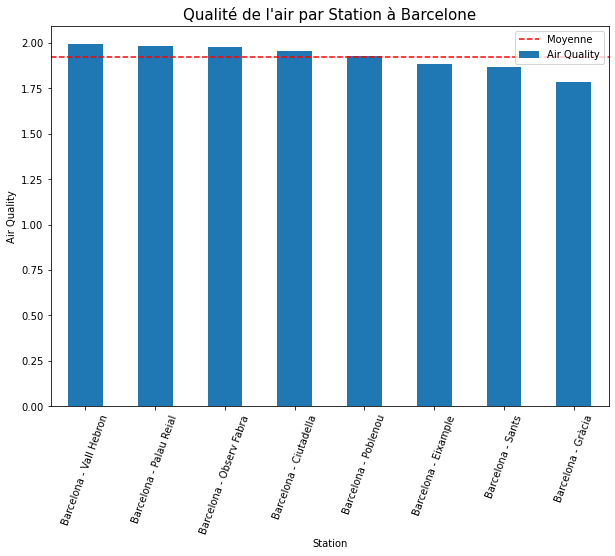

In [55]:
air_qua_station.plot.bar(rot=70, figsize=(10,7))
plt.axhline(y=air_qua_station['Air Quality'].mean(), color='r', label='Moyenne', linestyle='--')
plt.title("Qualité de l'air par Station à Barcelone", fontsize = 15)
plt.ylabel("Air Quality")
plt.legend()
plt.show()

### 15b - Visualisation avec la fonction plot de Seaborn

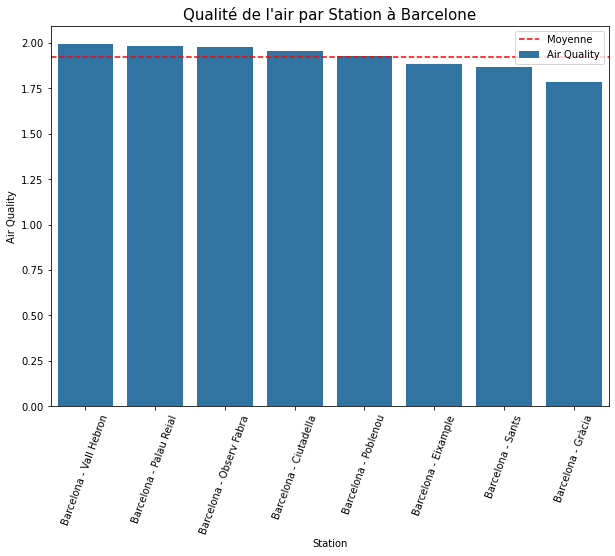

In [38]:
plt.figure(figsize=(10,7))
sns.barplot(data = air_qua_station, x = air_qua_station.index, y = 'Air Quality', label = 'Air Quality', color='tab:blue')
plt.axhline(y=air_qua_station['Air Quality'].mean(), color='r', label='Moyenne', linestyle='--')
plt.xticks(rotation=70)
plt.title("Qualité de l'air par Station à Barcelone", fontsize = 15)
plt.legend()
plt.show()

### 15c - Visualisation avec la fonction plot de Matplotlib

In [39]:
color = air_qua_station['Air Quality'].apply(lambda x: 'tab:blue' if x > air_qua_station['Air Quality'].mean() else 'lightcoral')

In [40]:
color

Station
Barcelona - Vall Hebron       tab:blue
Barcelona - Palau Reial       tab:blue
Barcelona - Observ Fabra      tab:blue
Barcelona - Ciutadella        tab:blue
Barcelona - Poblenou          tab:blue
Barcelona - Eixample        lightcoral
Barcelona - Sants           lightcoral
Barcelona - Gràcia          lightcoral
Name: Air Quality, dtype: object

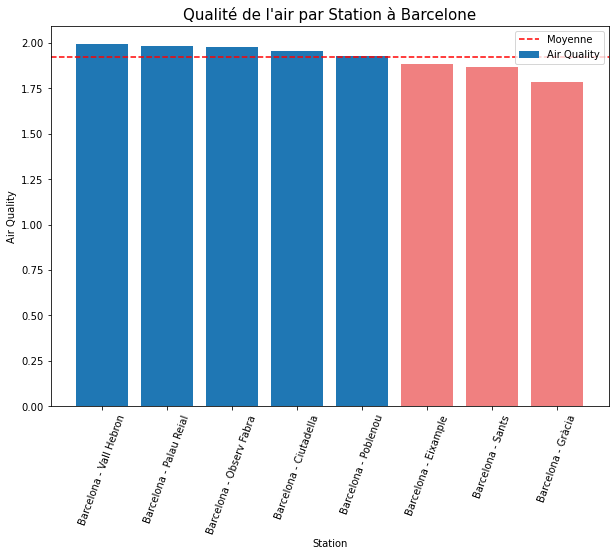

In [41]:
plt.figure(figsize=(10,7))
plt.bar(air_qua_station.index, air_qua_station['Air Quality'], color=color, label='Air Quality')
plt.axhline(y=air_qua_station['Air Quality'].mean(), color='r', label='Moyenne', linestyle='--')
plt.xticks(rotation=70)
plt.xlabel("Station")
plt.ylabel("Air Quality")
plt.title("Qualité de l'air par Station à Barcelone", fontsize = 15)
plt.legend()
plt.show()

### 16 - Visualisation en nuage de point (scatterplot)

In [42]:
scaplot = air_quality.loc[:,['Station', 'Air Quality', 'O3 Quality', 'O3 Value', 'NO2 Quality', 'NO2 Value']]
scaplot

,Station,Air Quality,O3 Quality,O3 Value,NO2 Quality,NO2 Value
0,Barcelona - Sants,2,NaN,0,Good,84
1,Barcelona - Eixample,1,Good,1,Moderate,113
2,Barcelona - Gràcia,2,Good,10,Good,73
3,Barcelona - Ciutadella,2,Good,2,Good,86
4,Barcelona - Vall Hebron,2,Good,7,Good,69
...,...,...,...,...,...,...
5739,Barcelona - Ciutadella,2,Good,10,Good,57
5740,Barcelona - Vall Hebron,2,Good,32,Good,31
5741,Barcelona - Palau Reial,2,Good,40,Good,20
5742,Barcelona - Poblenou,2,NaN,0,Good,70


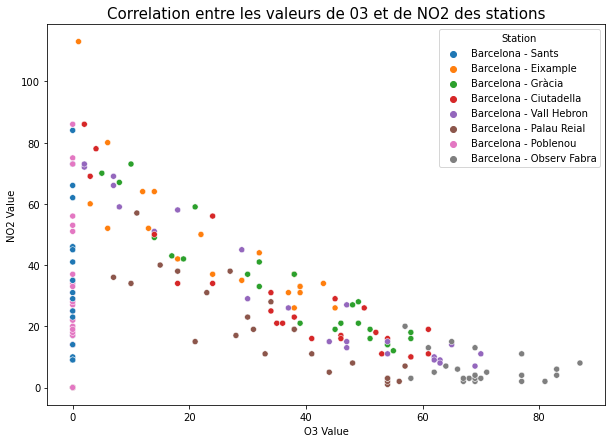

In [43]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=scaplot.head(200), x='O3 Value', y='NO2 Value', hue='Station')
plt.title('Correlation entre les valeurs de 03 et de NO2 des stations', fontsize=15)
plt.show()

### 17 - Analyse des corrélations entre variables

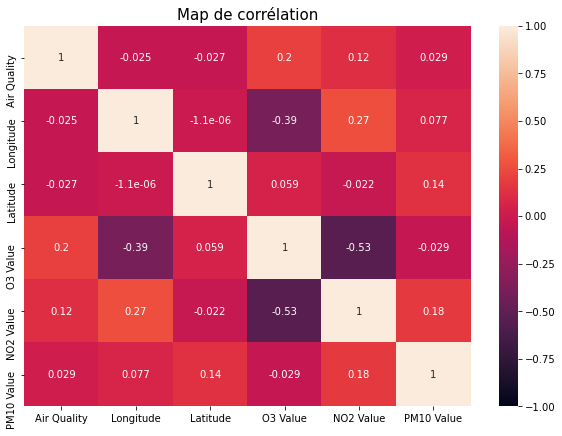

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(air_quality.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Map de corrélation", fontsize=15)
plt.show()